In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
housing = pd.read_csv('../data/Property_Assessment_Data__Current_Calendar_Year_.csv')

In [4]:
housing.head()

,Account Number,Suite,House Number,Street Name,Assessed Value,Assessment Class,Neighbourhood ID,Neighbourhood,Ward,Garage,Latitude,Longitude
0,10202374,NaN,455.0,MCCONACHIE WAY NW,381500,Residential,2521.0,MCCONACHIE AREA,Ward 3,Y,53.630842,-113.428512
1,9969312,NaN,15519.0,103 STREET NW,463500,Residential,3040.0,BEAUMARIS,Ward 2,Y,53.616836,-113.500368
2,10030551,11,1780.0,GLASTONBURY BOULEVARD NW,271000,Residential,4720.0,GLASTONBURY,Ward 1,N,53.501531,-113.672511
3,1263045,306,14916.0,26 STREET NW,69500,Residential,2280.0,FRASER,Ward 4,N,53.611973,-113.379481
4,10176917,NaN,16923.0,71 STREET NW,553500,Residential,2700.0,SCHONSEE,Ward 3,Y,53.630884,-113.450859


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400733 entries, 0 to 400732
Data columns (total 12 columns):
Account Number      400733 non-null int64
Suite               79168 non-null object
House Number        357938 non-null float64
Street Name         357938 non-null object
Assessed Value      400733 non-null int64
Assessment Class    400733 non-null object
Neighbourhood ID    400732 non-null float64
Neighbourhood       400732 non-null object
Ward                400732 non-null object
Garage              400733 non-null object
Latitude            400733 non-null float64
Longitude           400733 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 36.7+ MB


In [17]:
housing.describe()

,Account Number,House Number,Assessed Value,Neighbourhood ID,Latitude,Longitude
count,4.007330e+05,357938.000000,4.007330e+05,400732.000000,400733.000000,400733.000000
mean,7.641811e+06,7805.215121,4.650889e+05,4248.229041,53.520088,-113.511503
std,3.267711e+06,5377.520285,3.682794e+06,1765.690833,0.067223,0.081645
min,1.001007e+06,1.000000,0.000000e+00,1010.000000,53.338595,-113.713318
25%,4.243184e+06,2741.000000,1.765000e+05,2600.000000,53.461483,-113.566858
50%,9.940371e+06,8308.000000,3.230000e+05,4500.000000,53.521727,-113.509569
75%,1.013078e+07,11452.000000,4.255000e+05,5576.000000,53.573793,-113.448343
max,1.094012e+07,51175.000000,1.338810e+09,8888.000000,53.715149,-113.278435


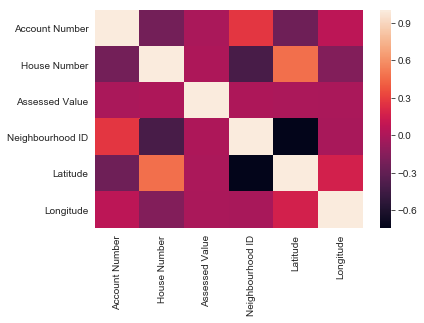

In [18]:
sns.heatmap(housing.corr())

Notice that all of the columns used in this heat map are either unique to each and every house or are so common that no significant difference can be obtained. The latitude and longitude should be extremely good at predicting, but since all coords are in Edmonton the difference between them is insignificant

In [19]:
houseX = housing.drop('Assessed Value', axis=1)

In [20]:
houseY = housing['Assessed Value']

In [21]:
houseX.head()

,Account Number,Suite,House Number,Street Name,Assessment Class,Neighbourhood ID,Neighbourhood,Ward,Garage,Latitude,Longitude
0,10202374,NaN,455.0,MCCONACHIE WAY NW,Residential,2521.0,MCCONACHIE AREA,Ward 3,Y,53.630842,-113.428512
1,9969312,NaN,15519.0,103 STREET NW,Residential,3040.0,BEAUMARIS,Ward 2,Y,53.616836,-113.500368
2,10030551,11,1780.0,GLASTONBURY BOULEVARD NW,Residential,4720.0,GLASTONBURY,Ward 1,N,53.501531,-113.672511
3,1263045,306,14916.0,26 STREET NW,Residential,2280.0,FRASER,Ward 4,N,53.611973,-113.379481
4,10176917,NaN,16923.0,71 STREET NW,Residential,2700.0,SCHONSEE,Ward 3,Y,53.630884,-113.450859


In [22]:
houseX.nunique()

Account Number      400733
Suite                 1892
House Number         18443
Street Name           2842
Assessment Class         4
Neighbourhood ID       398
Neighbourhood          398
Ward                    12
Garage                   2
Latitude            258219
Longitude           258219
dtype: int64

Since there is a unique account number for every row, we will drop that part.

In [23]:
houseX.drop('Account Number', axis=1, inplace=True)

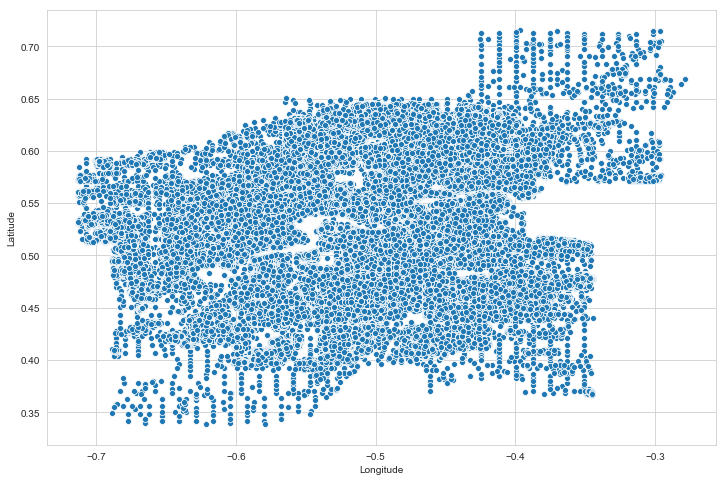

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=houseX)

This is quite a strange map, What could be causing this?
To answer that, we will first try normalizing the data by removing the digits before the decimal.

In [38]:
from math import floor, ceil
def returnMantissa(num):
    # Returns the mantissa
    if num > 0:
        integer = floor(num)
    elif num < 0:
        integer = ceil(num)
    else:
        return np.nan
    return num % integer

for ax in ['Longitude', 'Latitude']:
    houseX[ax] = houseX[ax].apply(lambda num: returnMantissa(num))

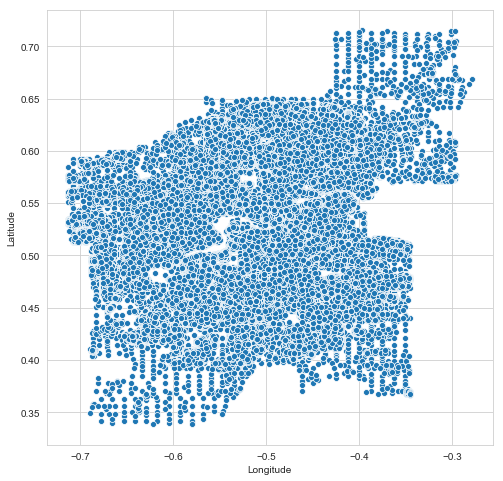

In [43]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=houseX)

There we go. Now, let's try and see what trends we can already start to pick out in this

In [44]:
houseX.columns

Index(['Suite', 'House Number', 'Street Name', 'Assessment Class',
       'Neighbourhood ID', 'Neighbourhood', 'Ward', 'Garage', 'Latitude',
       'Longitude'],
      dtype='object')

In [45]:
houseX.nunique()

Suite                 1892
House Number         18443
Street Name           2842
Assessment Class         4
Neighbourhood ID       398
Neighbourhood          398
Ward                    12
Garage                   2
Latitude            258219
Longitude           258219
dtype: int64

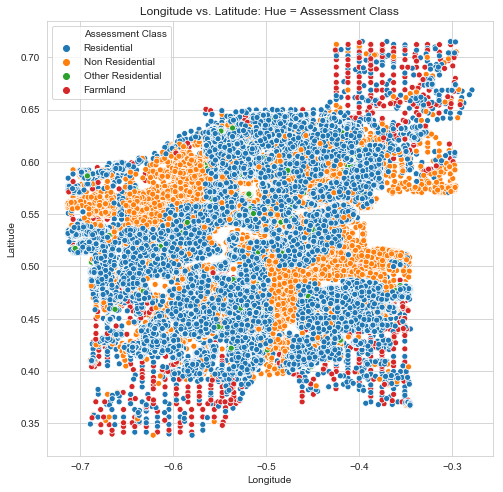

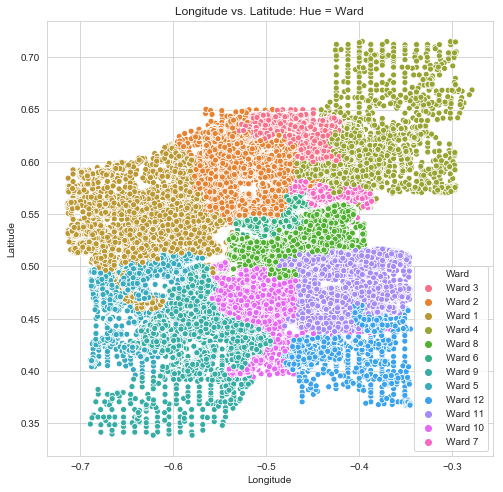

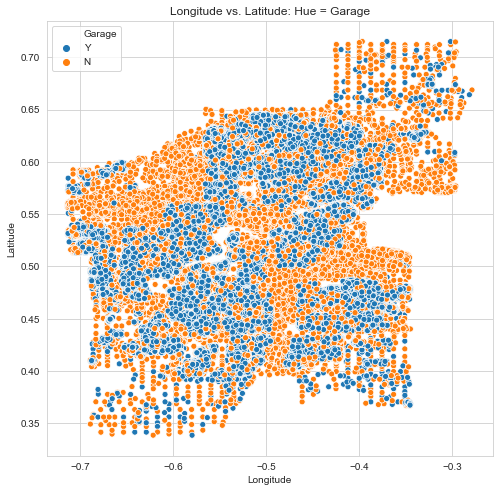

In [50]:
for hue in ['Assessment Class', 'Ward', 'Garage']:
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x='Longitude', y='Latitude', hue=hue, data=houseX)
    plt.title('Longitude vs. Latitude: Hue = ' + hue)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')